## GANGBE Michael 
## GOUDIABY Fatou

# <center> Partie 1 : Classification & Clustering </center>

### Sujet

Récupérer un (ou plusieurs) jeu(x) de données :

- soit sur la bibliothèque scikit-learn ici.
- ou sur le UCI machine learning repository, et en réaliser l'analyse. 

On demande :

- un travail de clustering et un autre de classification,
- la comparaison de diverses méthodes, l'utilisation de plusieurs métriques,
- l'utilisation de techniques de réduction de dimension,
- l'écriture d'un notebook détaillé, incluant ce qui précède, à m'envoyer à la fin du module.

### Exemple choisi pour travailler

####Iris dataset
Notre choix se porte sur le dataset d'iris décrit sur le lien : 
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris"> suivant</a>.

Ce dataset est un dataset de classification qui est déjà traité.

<img src="./Images/iris.jpg">

### Objectif
C'est de trouver pour chaque entrée l'espèce correspondante grâce aux 4 mesures prises sur chaque fleur.



# Les étapes du machine learning

###Cycle de travail du machine learning


<img src="./Images/cycle-de-travail.jpg">

-	Récupération -> On récupère des données de test ;
-	Nettoyage -> On ne garde que les données cohérentes/consistantes sans valeurs aberrante ni manquante ; 
-	Exploration -> Analyse des données afin de mieux comprendre leurs comportements, le phénomène sous-jacent et de déterminer une méthode de modélisation ;
-	Modélisation -> Créer le modèle statistique associé aux données => trouver un modèle du phénomène à l’origine des données => choix de l’algorithme adapté ;
-	Évaluation & interprétation -> évaluer la capacité du modèle à représenter avec exactitude notre phénomène ;
-	Mise en production -> On publie l’algorithme pour l’utiliser.

## Étape 1 : Récupération des données & import des librairies

Pour rappel ce dataset est déjà nettoyer, donc l'étape du nettoyage ne sera pas appliqué pour ce dataset. De plus, nous ne publierons pas l'algorithme donc l'étape de mise en production sera elle aussi ignoré.

In [ ]:
# Data structures
import pandas as pd
import numpy as np

# Graphics
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Validation
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Classification algorithms
from sklearn import neighbors, datasets
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Clustering algorithms
from sklearn.cluster import KMeans, MeanShift
from sklearn.mixture import GaussianMixture

# Clustering evaluation
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, pairwise_distances

# Dimensional reduction
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler

## Jeu d'entraînement du jeu de données

In [ ]:
print('Nombre d\'entrées : ', iris_dataset.data.shape[0])
print('Nombre de dimensions : ', iris_dataset.data.shape[1])
print('La liste des attributs : ', iris_dataset.feature_names)

Nombre d'entrées :  150
Nombre de dimensions :  4
La liste des attributs :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Ces dimensions sont des variables explicatives, nous permettant d'expliquer l'espèce contenue dans l'attribut target de chaque entrée. 

In [ ]:
print('Nous disposons de', len(iris_dataset.target_names), 'espèces qui sont :', iris_dataset.target_names)

Nous disposons de 3 espèces qui sont : ['setosa' 'versicolor' 'virginica']


Ci-dessous, le résultat attendu (target du jeu d'entraînement). 
Chaque valeur du tableau correspond à un index du tableau des noms de targets (target_names array).

In [ ]:
print(iris_dataset.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Une chose très intéressante en utilisant numpy est que nous pouvons choisir de récupérer seulement les données d'une espèce par exemple, avec le code ci-dessous, nous obtenons un tupple avec l'index de chaque cible de valeur 0 qui a été stocké dans le tableau numpy de la cible. 

In [ ]:
print(np.where(iris_dataset.target == 0))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),)


# Étape 2 : Data exploration

Nous allons analyser les données pour mieux comprendre leur comportement, le phénomène sous-jacent et déterminer une méthode de modélisation.
Pour chaque caractéristique et chaque espèce, nous vérifierons si un phénomène existe.

## Visualisation des données

Nous importons les données dans un dataframe ce qui nous permet de visualiser plus précisément les données.

In [ ]:
iris_dataframe = pd.DataFrame(iris_dataset.data, columns = iris_dataset.feature_names)
iris_dataframe.head(10)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4
6                4.6               3.4                1.4               0.3
7                5.0               3.4                1.5               0.2
8                4.4               2.9                1.4               0.2
9                4.9               3.1                1.5               0.1

Nous créeons une matrice de graphique représentant la répartition des espèces dans un plan 2D en fonction de pair de caractéristique. Chaque caractéristique est exprimée en cm.

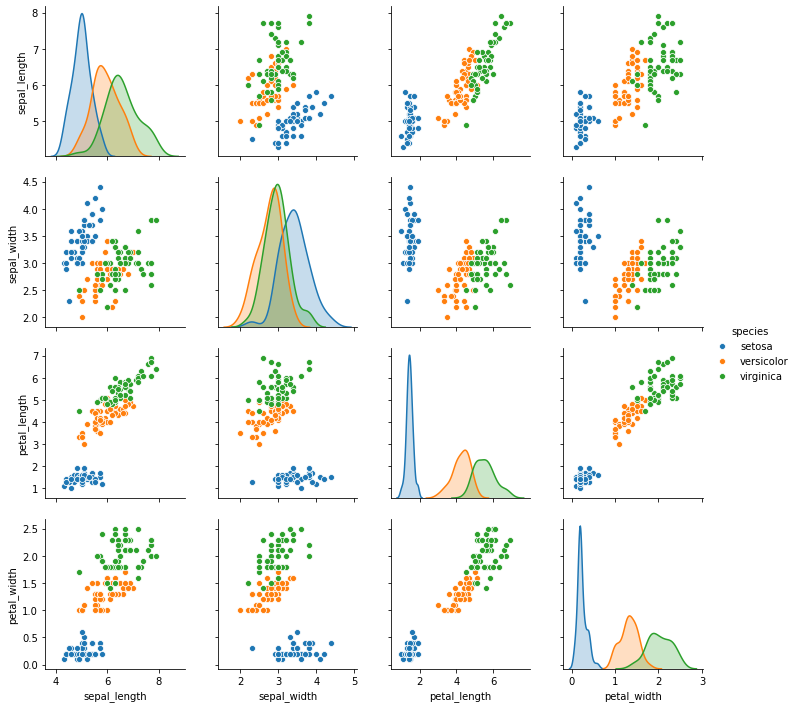

In [ ]:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue='species', height=2.5);

Grâce à ces graphiques nous remarquons que la plupart des pairs de caractéristiques, se répartissent selon 3 valeurs gaussiennes (moyennes différentes), selon l'espèce considéré. Ces trois tendances indiquent qu'une classification est possible en utilisant plusieurs jeux d'entraînements différents selon les caractéristiques utilisées.
Le chevauchement des gaussiennes produirait des erreurs de classification, si on ne se contente que de cette variable explicative. 

Selon la visualisation des données on voit l'utilisation des dimensions "sepal_width" et "sepal_length" devrait produire ces erreurs puisque les espèces "versicolor" et "virginica" se superpose.

Afin de comparer le résultat obtenu lors d'un choix d'une paire de caractéristique superposante et non superposante. Nous effectuerons de l'apprentissage automatique suivant la méthode SVM (Support Vector Machine) sur deux jeux de données.

Le premier jeu de donées utilisera la longueur et la largeur des pétales qui semblent éviter le chevauchement des gaussiennes quant au second jeu de données, il sera composé de la longueur et de la largueur des sépales.

Représentons maintenant deux nuages de points, l'un pour les sépales et l'autre pour les pétales (longueur en abscisse, largeur en ordonnées), en colorant chaque point suivant son espèce (variable à expliquer, variable c de scatter).

# Étape 3 : Modélisation 

## SVM: Le SVC de sklearn

### Sépales d'iris

Nous commençons par classer les iris en fonction de leurs sépales, puis nous les classeront suivant leurs pétales.

La variable explicative "X" contient les deux premières colonnes qui sont (sepal length et sepal width) et la variable explicative "Y" contient les cibles.

Nous divisons notre ensemble de données en deux ensembles: un ensemble d'apprentissage et un ensemble de tests. 80% de nos données seront utilisées pour faire l'apprentissage de l'algorithme et 20% seront utilisées pour la prédiction des cibles. Par exemple, X_train contient 80% des données X et X_test contient les derniers 20% des données X.

La variable random_state est utilisée pour initialiser le générateur de nombres aléatoires interne, qui décidera de la division des données en indices d'entraînement et de test. On peut modifier cette variable random_state pour effectuer une séparation différente de l'ensemble de données, une classification différente.

Cela permet d'améliorer l'algorithme, Si vous remarquez que l'algorithme a une meilleure prédiction quand il est formé en utilisant un random_state spécifique.


In [ ]:
X = iris_dataset.data[:,:2]
Y = iris_dataset.target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Ensuite, nous avons besoin d'instancier un classifier avec des vecteurs de support.

In [ ]:
clf = SVC(kernel='linear', random_state=42)

Comme notre algorithme est supervisé, nous pouvons l'entraîner en passant notre jeu d'entraînement et nos valeurs cibles.

In [ ]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

Fin de l'entraînement, maintenant nous pouvons essayer de prédire nos données de test.

In [ ]:
y_pred = clf.predict(X_test)
print(y_test)
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 1 0 2 2 2 2 2 0 0]


Les prédictions sont bonnes.
La qualité de ces prédictions peut être quantifiée en utilisant la méthode accuracy_score de sklearn.metrics.
Cette fonction peut effectuer deux types de test de précision.

Elle possède un paramètre optionnel appelé normalize qui est une valeur booléenne (default=true). Si ce paramètre vaut false, la fonction retourne le nombre d'échantillons correctement classés. Sinon, elle retourne la fraction des échantillons correctement classés.

Ainsi, la meilleure performance est de 1 avec normalize == True et le nombre d'échantillons avec normalize == False.

In [ ]:
accuracy_score(y_test, y_pred)

0.9

Comme on peut le voir, le résultat est assez bon, 9/10 échantillons sont bien prédits.

Essayons maintenant l'algorithme avec les pétales d'iris.

## Pétales d'iris

La variable explicative X contient les deux dernières colonnes qui sont "longueur et largeur" des pétales, tandis que la variable explicative y contient toujours les cibles.

In [ ]:
X = iris_dataset.data[:,2:]
y = iris_dataset.target

Nous reproduisons l'étape 2 précédemment réalisée avec les sépales, consistant à diviser notre jeu de données en un ensemble d'apprentissage et un ensemble de tests.
Après avoir essayé plusieurs séparations de données, nous obtenons un taux de réussite de 100% en utilisant cette séparation :

- 70% des données pour faire l'apprentssage de l'algorithme et 30% pour tester l'algorithme.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Ensuite, nous avons besoin d'instancier le classificateur.

In [ ]:
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

Comme prévu, les pétales sont meilleures comme variables explicatives.

In [ ]:
y_pred = clf.predict(X_test)
print(y_test)
print(y_pred)

accuracy_score(y_test, y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


1.0

# Étape 4 : Évaluation & interprétation

Précédemment, nous avons utilisé une méthode de précision afin d'évaluer l'efficacité de notre algorithme.
Cependant, nous découpons notre jeu de données initial en deux parties. Un jeu de données d'entraînement (70/80% des données initiales) et un jeu de données de test (30/20%). Nous pouvons nous l'imaginer par la figure ci-dessous. 

###  50% jeu d'entraînement et de 50% jeu de test

<img src="./Images/test-data.png" width="300" height="300">


Un problème évident survient, les données utilisées pour l'entraînement et pour les tests corrrespondent à une partie des données du jeu initiale, statique. Ces donnnées peuvent empêcher une bonne généralisation de l'algorithme lors de l'utilisation de celui-ci avec de nouvelles données.

Afin d'éviter ce problème, nous pouvons appliquer une validation croisée, elle nous permettra d’utiliser l'intégralité de notre jeu de données pour l’entraînement et pour la validation. 

### La validation croisée

<img src="./Images/validation.png" width="300" height="300">


Le principe est simple, on découpe le jeu de données en k parties (folds) à peu près égales. Tour à tour, chacune des k parties est utilisée comme jeu de test. Le reste (autrement dit, l’union des k-1 autres parties) est utilisé pour l'entraînement.

Nous pouvons implémenter cette validation croisée avec la fonction cross_val_score du module model_selection de sklearn.

On peut alors se référer à la moyenne et à l'écart type de ces scores, pour avoir une bonne évaluation, par validation croisée, de la précision du classifieur.

In [ ]:
svc_scores = cross_val_score(clf, X_train, y_train, cv=4)
print(svc_scores)

[0.92857143 0.84615385 0.96153846 0.96      ]


In [ ]:
print("Moyenne : {0:.4f}".format(svc_scores.mean()))
print("Écart-type : {0:.4f}".format(svc_scores.std()))

Moyenne : 0.9241
Écart-type : 0.0469


La moyenne étant proche de 1, le score de cross-validation est très bon.

# Autres méthodes de classification

# K-Nearest Neighbors

K-NN est un algorithme assez simple à appréhender. Principalement, grâce au fait qu’il n’a pas besoin de modèle pour pouvoir effectuer une prédiction. Le contre coût est qu’il doit garder en mémoire l’ensemble des observations pour pouvoir effectuer sa prédiction. Ainsi il faut faire attention à la taille du jeu d’entrainement. 

Également, le choix de la méthode de calcul de la distance ainsi que le nombre de voisins K peut ne pas être évident. Il faut essayer plusieurs combinaisons et faire du tuning de l’algorithme pour avoir un résultat satisfaisant.

## Sépales d'iris

En utilisant : sepal length (cm) et sepal width (cm), 
nous obtenons un taux de réussite à la prédiction de : 72.7030%.

Espèces: Virginica en vert, Versicolor en orange et Setosa en orange.


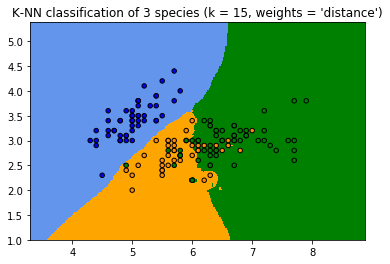

In [ ]:
number_of_neighbors = 15

# La variable explicative X contient les deux dernières colonnes qui sont "longueur des sépales" et "largeur des sépales"
X = iris_dataset.data[:, :2]
y = iris_dataset.target

# Split du jeu d'entraînement et du jeu de test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Taille du pas du maillage, plus il est élevé mois bien sera défini le maillage.
# Avec une petite valeur le maillage sera précis.
h = .02  

# Créer une map de couleur pour colorer chaque espèce.
areas_background_color = ListedColormap(['cornflowerblue', 'orange', 'green'])
points_color = ListedColormap(['blue', 'darkorange', 'green'])

for weights in ['distance']:
    # Nous créeons une instance d'un classifier de voisins et nous "fitons" les données d'entraînement ainsi
    # que leur target correspondante.
    clf = neighbors.KNeighborsClassifier(number_of_neighbors, weights=weights)
    clf.fit(X_train, y_train)

    # Nous mettons en place la limite de la décision. Pour cela, nous allons attribuer une couleur 
    # à chaque point dans le maillage [x_min, x_max] && [y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    #cm = confusion_matrix(y_test, y_pred)
    #accuracy = accuracy_score(y_test, y_pred)*100
    #print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

    
    # Nous mettons le résultat dans un plot de couleur.
    y_pred = y_pred.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, y_pred, cmap=areas_background_color)

    # Plot aussi les points d'entraînements.
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=points_color,
                edgecolor='k', s=20)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.title("K-NN classification of 3 species (k = %i, weights = '%s')"
             % (number_of_neighbors, weights))

# Cross-validation
svc_scores = cross_val_score(clf, X, y, cv=4)
print("En utilisant : {} et {}".format(iris_dataset.feature_names[0], iris_dataset.feature_names[1])
      +", \nnous obtenons un taux de réussite à la prédiction de : {0:.4f}".format(svc_scores.mean() * 100)
      +"%.\n")

print("Espèces: Virginica en vert, Versicolor en orange et Setosa en orange.")
plt.show()

Comme nous pouvons l'apercevoir, les pédictions sont moyennes, le résultat n'est pas très concluant. L'algorithme a des difficultés à distinguer l'espèce Virginica et l'espèce Setosa à l'origine des différentes entrées de test de l'algorithme.  

## Pétales d'iris

En utilisant : petal length (cm) et petal width (cm), 
nous obtenons un score de cross-validation de : 95.2991%.

Espèces: Virginica en vert, Versicolor en orange et Setosa en orange.


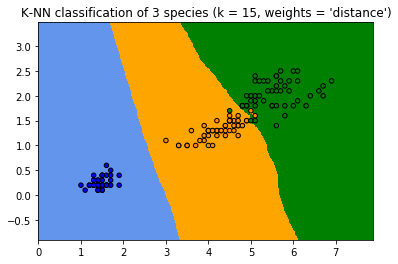

In [ ]:
number_of_neighbors = 15

# La variable explicative X contient les deux dernières colonnes qui sont "longueur des pétales" et "largeur des pétales"
X = iris_dataset.data[:, 2:]
y = iris_dataset.target

# Split du jeu d'entraînement et du jeu de test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Taille du pas du maillage, plus il est élevé mois bien sera défini le maillage.
# Avec une petite valeur le maillage sera précis.
h = .02  

# Create color maps for each species.
areas_background_color = ListedColormap(['cornflowerblue', 'orange', 'green'])
points_color = ListedColormap(['blue', 'darkorange', 'green'])

for weights in ['distance']:
    # Nous créeons une instance d'un classifier de voisins et nous "fitons" les données d'entraînement ainsi
    # que leur target correspondante.
    clf = neighbors.KNeighborsClassifier(number_of_neighbors, weights=weights)
    clf.fit(X_train, y_train)

    # Nous mettons en place la limite de la décision. Pour cela, nous allons attribuer une couleur 
    # à chaque point dans le maillage [x_min, x_max] && [y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Nous mettons le résultat dans un plot de couleur.
    y_pred = y_pred.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, y_pred, cmap=areas_background_color)

    # Plot aussi les points d'entraînements.
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=points_color,
                edgecolor='k', s=20)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.title("K-NN classification of 3 species (k = %i, weights = '%s')"
             % (number_of_neighbors, weights))
    
# Cross-validation
svc_scores = cross_val_score(clf, X, y, cv=4)
print("En utilisant : {} et {}".format(iris_dataset.feature_names[2], iris_dataset.feature_names[3])
      +", \nnous obtenons un score de cross-validation de : {0:.4f}".format(svc_scores.mean() * 100)
      +"%.\n")

print("Espèces: Virginica en vert, Versicolor en orange et Setosa en orange.")

plt.show()

Pour les pétales d'iris les prédictions sont bien meilleurs, nous avons un score proche des 100% ce qui constitue le score maximum atteignable. La distinction entre l'espèce Virginica et Setosa est presque toujours bien géré.

# Arbre de décision

Les arbres de décision sont une méthode d'apprentissage supervisée non paramétrique utilisée pour la classification et la régression. Le but est de créer un modèle qui prédit la valeur d'une variable cible en apprenant des règles de décision simples déduites des caractéristiques des données.

Puisque nous n'avons pas énormément de features, pour cette classification, nous pouvons essayer d'exploiter chaque pair de dimension du dataset dans un arbre de décision.

En utilisant : sepal length (cm) et sepal length (cm), 
nous obtenons un score de cross-validation de : 68.5363%.

En utilisant : sepal length (cm) et sepal length (cm), 
nous obtenons un score de cross-validation de : 92.5214%.

En utilisant : sepal length (cm) et sepal length (cm), 
nous obtenons un score de cross-validation de : 90.5449%.

En utilisant : sepal width (cm) et sepal width (cm), 
nous obtenons un score de cross-validation de : 91.3996%.

En utilisant : sepal width (cm) et sepal width (cm), 
nous obtenons un score de cross-validation de : 94.0171%.

En utilisant : petal length (cm) et petal length (cm), 
nous obtenons un score de cross-validation de : 95.2991%.



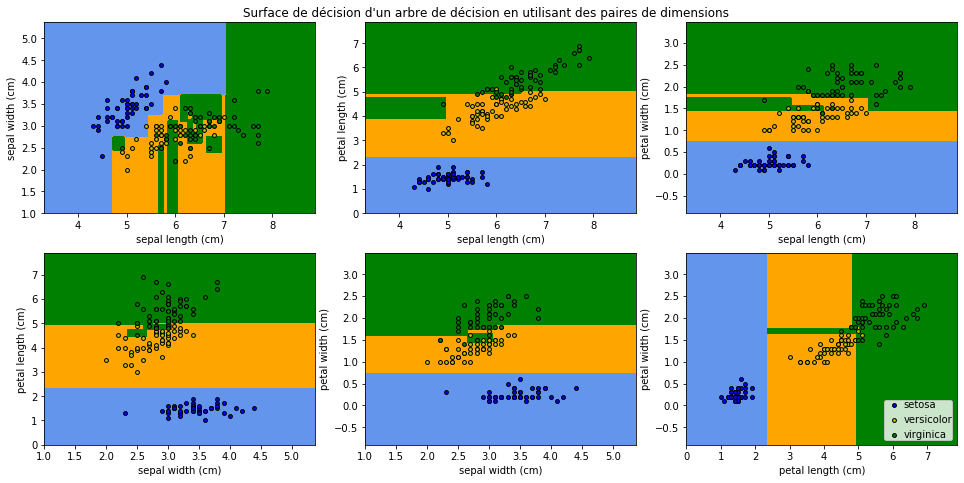

In [ ]:
# Parameters
n_classes = 3
plot_colors = "byg"
areas_background_color = ListedColormap(['cornflowerblue', 'orange', 'green'])
plot_step = 0.02

# Targets
y = iris_dataset.target

# Configure la dimension des graphiques.
plt.figure(figsize=(14, 7))

for pair_index, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                  [1, 2], [1, 3], [2, 3]]):
    
    # La variable explicative X contient à chaque itération, une nouvelle pair de dimension du dataset. 
    # exemple: "sepal_length && sepal_width".
    X = iris_dataset.data[:, pair]
    
    name_feature1 = iris_dataset.feature_names[pair[0]]
    name_feature2 = iris_dataset.feature_names[pair[1]]
    
    # Split du jeu d'entraînement et du jeu de test.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
    
    # Fit les données, entraînement de l'algorithme.
    clf = DecisionTreeClassifier().fit(X_train, y_train)

    # Cross-validation
    svc_scores = cross_val_score(clf, X, y, cv=4)
    print("En utilisant : {} et {}".format(name_feature1, name_feature1)
          +", \nnous obtenons un score de cross-validation de : {0:.4f}".format(svc_scores.mean() * 100)
          +"%.\n")
    
    # Plot la limite de décision.
    plt.subplot(2, 3, pair_index + 1)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    # Prédiction
    y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    y_pred = y_pred.reshape(xx.shape)
    
    cs = plt.contourf(xx, yy, y_pred, cmap=areas_background_color)

    # Définit les noms des axes des graphiques.
    plt.xlabel(iris_dataset.feature_names[pair[0]])
    plt.ylabel(iris_dataset.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        
        index = np.where(y == i)
        
        plt.scatter(X[index, 0], X[index, 1], c=color, label=iris_dataset.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

# General feat
plt.suptitle("Surface de décision d'un arbre de décision en utilisant des paires de dimensions")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

# Décommenter cette section, pour voir l'arborescence d'un modèle construit sur l'ensemble des fonctionnalités.
# plt.figure(figsize=(14, 7))
# clf = DecisionTreeClassifier().fit(iris_dataset.data, iris_dataset.target)
# plot_tree(clf, filled=True)
plt.show()
    

On retrouve notre suite logique, l'utilisation des dimensions "largeur de sépale" et "longueur de sépale" nous fournissent des résultats moyens bon lors de la prédiction après entraînement de l'algorithme.
Alors que l'utilisation de "la largeur des pétales" et de "la longueur des pétales" nous fournissent de très très bon résultat.

# Réduction de dimension

La réduction de la dimension est un processus qui consiste à prendre des données dans un espace de grande dimension, et à les remplacer par des données dans un espace de plus petite dimension.

Les données d'un dataset sont représentées sous la forme d'une matrice X de dimension n×p , où n est le nombre d'observations et p le nombre de variables les représentant. p est généralement un nombre assez grand, qui peut aller jusqu'à plusieurs dizaines de milliers dans certaines applications. C'est le cas par exemple lorsqu'on traite des images en haute résolution, et que chaque variable représente un pixel de cette image.

Nous pouvons assez facilement représenter des données en 2 ou 3 dimensions. Mais au-delà, on est obligé de regarder les variables paire par paire (ou triplet par triplet) comme nous l'avons fait précédement. Ça devient assez vite difficile voire impossible quand le nombre de dimensions augmente.

L'analyse en composantes principales (PCA) appliquée à ces données identifie la combinaison d'attributs (composantes principales, ou directions dans l'espace des caractéristiques) qui explique la plus grande variance dans les données. Ici, nous traçons les différents échantillons sur les 2 premières composantes principales.

L'analyse en composantes principales incrémentale (IPCA) est généralement utilisée en remplacement de l'analyse en composantes principales (PCA) lorsque l'ensemble de données à décomposer est trop important pour tenir dans la mémoire. Elle n'est donc pas très utile dans notre situation.

L'analyse discriminante linéaire (LDA) tente d'identifier les attributs qui expliquent la plus grande variance entre les classes. En particulier, la LDA, contrairement à la PCA, est une méthode supervisée, utilisant des étiquettes de classe connues.

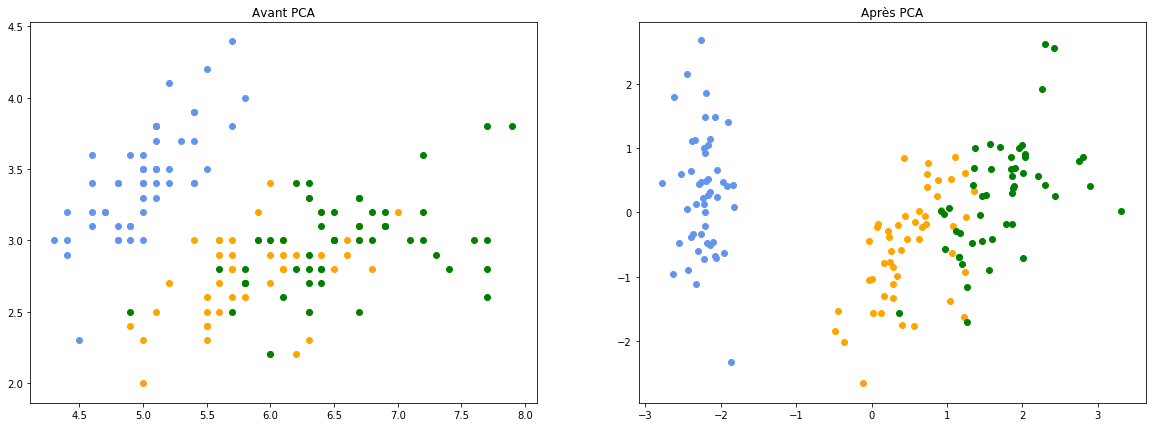

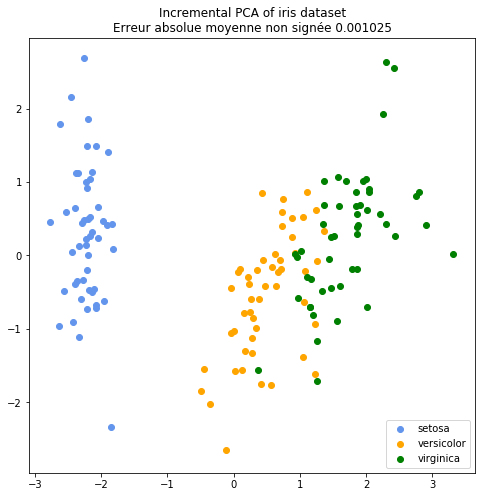

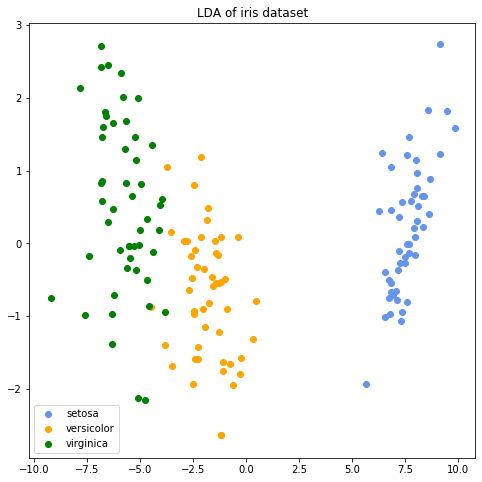

In [ ]:
# La variable explicative X contient l'ensemble des données du dataset.
X = iris_dataset.data
y = iris_dataset.target

# Nombre de components (dimensions).
n_components = 2

# Réduit la dimension a 2 pour technique de réduction de dimension.
# Afin de ne pas avoir de variances liées aux unités différentes. 
# On constitute un pipeline afin de normaliser les données
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=n_components))
X_pca = pca.fit_transform(X)

ipca = make_pipeline(StandardScaler(),
                     IncrementalPCA(n_components=n_components, batch_size=10))
X_ipca = ipca.fit_transform(X)

lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=2))
X_lda = lda.fit(X, y).transform(X)

# Détermine les couleurs pour les distinguer les espèces.
colors = ['cornflowerblue', 'orange', 'green']

# Céer un ensemble de deux figure, une avant pca et une après pca.
fig = plt.figure(figsize=(20,7))

before_pca_subfig = fig.add_subplot(121)
after_pca_subfig = fig.add_subplot(122)

for color, i, target_name in zip(colors, [0, 1, 2], iris_dataset.target_names):
    before_pca_subfig.scatter(X[y == i, 0], X[y == i, 1], color=color, lw=1, label=target_name)     
    after_pca_subfig.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, lw=1, label=target_name)

before_pca_subfig.set_title('Avant PCA')
after_pca_subfig.set_title('Après PCA')
    
# Créer les figures pour chaque technique de réduction de dimension sans la PCA.
for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_lda, "LDA")]:
    plt.figure(figsize=(8, 8))
    
    for color, i, target_name in zip(colors, [0, 1, 2], iris_dataset.target_names):
        plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1], color=color, lw=1, label=target_name)

    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of iris dataset\nErreur absolue moyenne non signée "
                  "%.6f" % err)
    else:
        plt.title(title + " of iris dataset")

    plt.legend(loc="best", shadow=False, scatterpoints=1)

plt.show()

On s'apperçoit que la séparation des nuages de points est bien mailleur aprés l'application de la PCA qu'avant l'application de la PCA.

Comme prévu, la PCA incrémentale semble très proche de la PCA classique.

Finalement, nous remarquons sur la dernière figure que la LDA est aussi très intéressante. La séparation des nuages de points est excellente et cela fait d'elle une bonne candidate afin d'être utilisé dans les algorithmes de classification.

Nous remarquons que le score de cross-validation est plus élevé que celui calculé lors de l'utilisation des dimensions : "largeur des pétales" et "longueur des pétales". Ce qui signifie que l'algorithme généralise est donc mieux en utilisant les données issues de la LDA.

# Clustering

Pour le clustering, nous allons continuer d'utiliser le dataset d'iris mais sans les targets associés à chaque observation.

De plus, nous nous baserons sur les données issues de la réduction de dimension PCA afin de réaliser des affichages 2D.

Nous ne tricherons pas en comparant les résultats du clustering avec les targets du dataset iris.

## K-Means

L'algorithme du K-Means clusterise les données en essayant de séparer les individus en groupes d'égale variance, minimisant ainsi l'inertie, ou somme des carrés intra-clusters.

Text(0.5, 1.0, 'Création des 3 clusters avec K-Means')

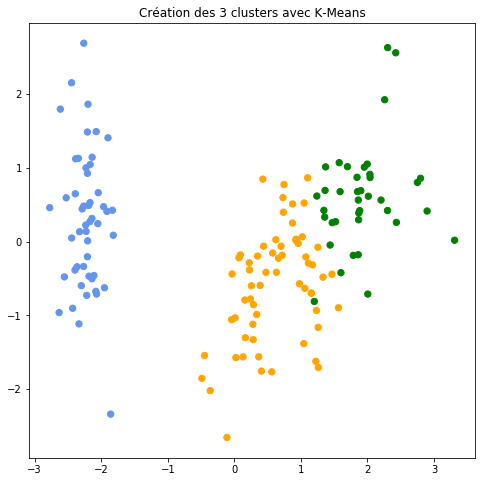

In [ ]:
# On utilise les données issue de la LDA.
n_clusters = 3

# Nous utilisons k-means++ afin d'avoir un meilleur choix de centre des clusters initiaux.
kmeans = KMeans(n_clusters=n_clusters, init = 'k-means++', random_state = 60).fit(X)
labels = kmeans.labels_

plt.figure(figsize=(8, 8))
colormap = np.array(['orange', 'cornflowerblue', 'green'])
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = colormap[kmeans.labels_],s=40)
plt.title("Création des 3 clusters avec K-Means")

Les clusters semblent être bien définis et bien représenter les 3 espèces recherchés.
Pour vérifier ceci, nous allons utiliser le système d'évaluation de clustering appelé "Indice de Calinski-Harabasz".
Ce score se définit comme le ratio entre la moyenne des dispersions entre clusters et la dispersion intra-cluster; plus il est grand, mieux c'est.

In [ ]:
print(n_clusters,':',calinski_harabasz_score(X, labels))

3 : 561.62775662962


Pour savoir si ce score est bon, nous allons réessayer l'algorithme avec un nombre de clusters dérisoirs. Et une initialisation du nombre de fois que l'algorithme va s'exécuter avec des graînes de centroides différentes absurde.

In [ ]:
kmeans = KMeans(n_clusters=10, init = 'k-means++', n_init=1, random_state = 60).fit(X)
print(n_clusters,':',calinski_harabasz_score(X, kmeans.labels_))

3 : 378.1914080680644


Effectivement, nous pouvons confirmer que la prédiction des cibles via 3 clusters a été bonne car elle possède un score d'évaluation élevé.

## Mean-shift

Le Mean-shift est un algorithme de clustering basé sur une fenêtre (boule) glissante, qui recherche des zones denses en points en bougeant les centroïdes des boules.

On cherche à localiser le centre de chaque classe, en mettant à jour les candidats comme moyenne des points dans la fenêtre. Les fenêtres sont finalement post-traitées, pour éliminer les chevauchements.

Text(0.5, 1.0, 'Création des clusters avec Mean-shift')

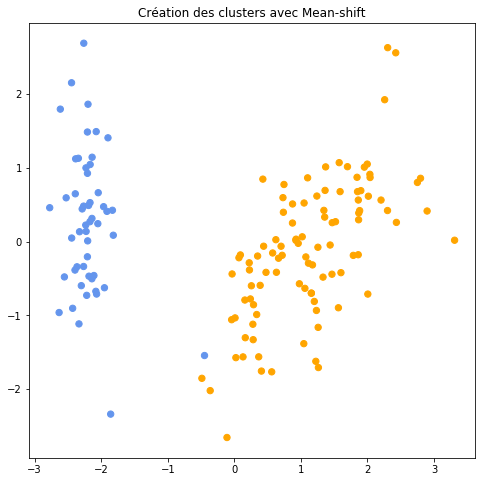

In [ ]:
meanShift = MeanShift(bandwidth=1).fit(X)

plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = colormap[meanShift.labels_],s=40)
plt.title("Création des clusters avec Mean-shift")

Le résultat est moins satisfaisant qu'avec K-Means, en effet nous avons seulement 2 clusters alors que nous cherchions à en avoir 3 puisque nous cherchons à prédire 3 espèces. 

Nous allons tout de même essayer d'évaluer le score de cette prédiction selon "l'Indice de Davies-Bouldin".
Cet indice est défini par la similarité moyenne entre chaque cluster  (𝐶𝑖)𝑖=1..𝑘  et son plus similaire 𝐶𝑗 .
Les clusters sont d'autant mieux séparés que l'indice de Davies-Bouldin est faible. 0 est le meilleur score, et le partitionnement est d'autant meilleur que l'indice est bas.

In [ ]:
davies_bouldin_score(X, meanShift.labels_) 

0.3885516762710395

L'indice est très bas, il est proche de 0. Cela indique un bon score d'après cet indice. 

Nous pouvons conclure que, nous avons deux espèces possèdant des caractéristiques similaires et ont donc été classées dans le même cluster ce qui n'est pas bon.

## Modèle de mélange gaussien

Text(0.5, 1.0, 'Création des 3 clusters avec Gaussian Mixture')

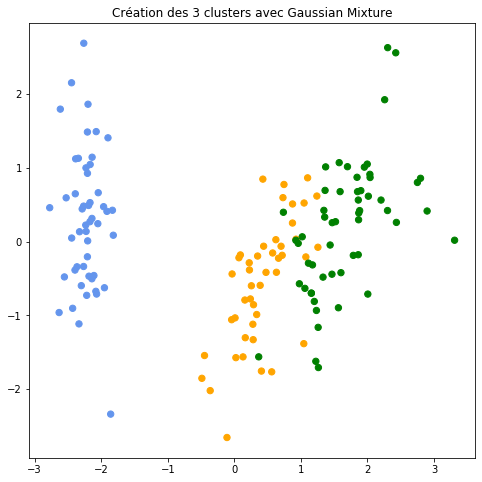

In [ ]:
nb_clusters = 3

gmm = GaussianMixture(n_components = nb_clusters, covariance_type = 'full').fit(X)

y_pred = gmm.predict(X)

plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = colormap[y_pred],s=40)
plt.title("Création des 3 clusters avec Gaussian Mixture")

Le résultat est satisfaisant, nos clusters semblent être bien définis et bien représenter les 3 espèces recherchés.

Nous allons évaluer ce clustering grâce à l'indice de Dunn. L'indice de Dunn est une mesure de validation interne du clustering. C'est le rapport entre la distance maximum qui sépare deux éléments classés ensemble et la distance minimum qui sépare deux éléments classés séparément.

Si les clusters sont compacts et bien séparés, le diamètre des clusters doit être petit quand la distance entre clusters doit être large. Donc un bon clustering est associé à de grandes valeurs de cet indice.

In [ ]:
# Définition de la méthode car elle n'est pas disponible dans la librairie de sklearn.
def dunn(X, labels):
    clusters = {}
    for k in range(nb_clusters):
        clusters[k] = np.array([X[l, :] for l in range(len(labels)) if labels[l] == k])
        
    max_diameter = max([np.amax(pairwise_distances(clusters[k], clusters[k])) for k in range(nb_clusters)])
    min_separation = min([np.amin(pairwise_distances(clusters[k], clusters[l])) for k in range(nb_clusters-1) for l in range(k+1,nb_clusters)])
    
    return min_separation/max_diameter


dunn(X, y_pred)

0.0691950987881798

Le score est très faible alors que les prédictions ont été bonnes. C'est un bon indice qui nous met en garde quand à l'interprétation d'une métrique d'évaluation d'un clustering. 

La métrique peut nous ressotir un très mauvais résultat alors que le clustering s'est bien déroulé.

# Conclusion


Sur ce projet nous travailer sur 3 algorithmes, 3 algorithmes de classifications, 3 techniques de réduction de dimension, 3 métriques pour évaluer les clusters et la cross-validation accompagnée d'une méthode d'exactitude de score pour la classification.